### Loading up and eyeballing the various dataframes in use

In [3]:
import pandas as pd

In [48]:
broadband_df = pd.read_csv('data/broadband_data.csv')
outage_df = pd.read_csv('data/outage_data.csv')
report_df = pd.read_csv('data/report_data.csv')
server_df = pd.read_csv('data/server_data.csv')
test_df = pd.read_csv('data/test_data.csv')
train_df = pd.read_csv('data/train_data.csv')

In [49]:
broadband_df

,id,broadband_type
0,6597,broadband_type_8
1,8011,broadband_type_8
2,2597,broadband_type_8
3,5022,broadband_type_8
4,6852,broadband_type_8
...,...,...
21071,3761,broadband_type_8
21072,8720,broadband_type_8
21073,6488,broadband_type_8
21074,878,broadband_type_8


In [50]:
outage_df

,id,outage_type
0,6597,outage_type_2
1,8011,outage_type_2
2,2597,outage_type_2
3,5022,outage_type_1
4,6852,outage_type_1
...,...,...
18547,3761,outage_type_1
18548,8720,outage_type_1
18549,6488,outage_type_2
18550,878,outage_type_2


In [51]:
report_df

,id,log_report_type,volume
0,6597,log_report_type_68,6
1,8011,log_report_type_68,7
2,2597,log_report_type_68,1
3,5022,log_report_type_172,2
4,5022,log_report_type_56,1
...,...,...,...
58666,8720,log_report_type_209,1
58667,6488,log_report_type_54,3
58668,878,log_report_type_62,1
58669,4464,log_report_type_209,1


In [52]:
server_df

,id,transit_server_type
0,6597,transit_server_type_11
1,8011,transit_server_type_15
2,2597,transit_server_type_15
3,5022,transit_server_type_15
4,5022,transit_server_type_11
...,...,...
31165,3761,transit_server_type_11
31166,8720,transit_server_type_11
31167,6488,transit_server_type_11
31168,878,transit_server_type_11


In [53]:
test_df

,id,area_code
0,3340,area_344
1,14067,area_933
2,1134,area_16
3,27,area_793
4,9793,area_344
...,...,...
1472,7975,area_124
1473,10664,area_821
1474,7753,area_476
1475,989,area_38


In [54]:
train_df

,id,area_code,outage_duration
0,13366,area_415,1
1,6783,area_474,0
2,9519,area_931,1
3,10202,area_700,1
4,4555,area_600,2
...,...,...,...
5899,1910,area_403,1
5900,10475,area_821,0
5901,10675,area_798,2
5902,14714,area_210,0


# EDA

### Checking for missing rows in all of the dataframes

In [55]:
broadband_df.isnull().sum()

id                0
broadband_type    0
dtype: int64

In [56]:
outage_df.isnull().sum()

id             0
outage_type    0
dtype: int64

In [57]:
report_df.isnull().sum()

id                 0
log_report_type    0
volume             0
dtype: int64

In [58]:
server_df.isnull().sum()

id                     0
transit_server_type    0
dtype: int64

In [59]:
train_df.isnull().sum()

id                 0
area_code          0
outage_duration    0
dtype: int64

In [60]:
test_df.isnull().sum()

id           0
area_code    0
dtype: int64

#### Since there are no missing data, we are good to go forward without any imputations

### Now, it is important to perform an inner join on the data based on ID

In [61]:
train_merged = train_df.merge(broadband_df, on='id').merge(outage_df, on='id').merge(report_df, on='id').merge(server_df, on='id')

In [62]:
train_merged

,id,area_code,outage_duration,broadband_type,outage_type,log_report_type,volume,transit_server_type
0,13366,area_415,1,broadband_type_2,outage_type_4,log_report_type_312,1,transit_server_type_35
1,6783,area_474,0,broadband_type_2,outage_type_2,log_report_type_312,2,transit_server_type_35
2,6783,area_474,0,broadband_type_2,outage_type_2,log_report_type_312,2,transit_server_type_34
3,6783,area_474,0,broadband_type_2,outage_type_2,log_report_type_233,1,transit_server_type_35
4,6783,area_474,0,broadband_type_2,outage_type_2,log_report_type_233,1,transit_server_type_34
...,...,...,...,...,...,...,...,...
48968,14714,area_210,0,broadband_type_2,outage_type_2,log_report_type_232,2,transit_server_type_34
48969,14714,area_210,0,broadband_type_2,outage_type_2,log_report_type_312,3,transit_server_type_35
48970,14714,area_210,0,broadband_type_2,outage_type_2,log_report_type_312,3,transit_server_type_34
48971,6253,area_1007,0,broadband_type_8,outage_type_2,log_report_type_201,6,transit_server_type_15


In [63]:
train_merged.shape

(48973, 8)

In [64]:
test_merged = test_df.merge(broadband_df, on='id').merge(outage_df, on='id').merge(report_df, on='id').merge(server_df, on='id')

In [65]:
test_merged

,id,area_code,broadband_type,outage_type,log_report_type,volume,transit_server_type
0,3340,area_344,broadband_type_2,outage_type_4,log_report_type_312,2,transit_server_type_35
1,14067,area_933,broadband_type_2,outage_type_1,log_report_type_134,1,transit_server_type_20
2,1134,area_16,broadband_type_8,outage_type_1,log_report_type_155,10,transit_server_type_11
3,1134,area_16,broadband_type_8,outage_type_1,log_report_type_170,6,transit_server_type_11
4,27,area_793,broadband_type_8,outage_type_1,log_report_type_73,3,transit_server_type_11
...,...,...,...,...,...,...,...
12861,989,area_38,broadband_type_3,outage_type_4,log_report_type_153,1,transit_server_type_10
12862,989,area_38,broadband_type_3,outage_type_4,log_report_type_154,1,transit_server_type_27
12863,989,area_38,broadband_type_3,outage_type_4,log_report_type_154,1,transit_server_type_10
12864,3129,area_1067,broadband_type_8,outage_type_1,log_report_type_54,8,transit_server_type_11


In [66]:
test_merged.shape

(12866, 7)

### Since we have multiple text fields, we should convert them to numeric values
#### Initial plan was to use something like `LabelEncoder` but since all of our values consistently have a numeric value associated with them (e.g. broadband_type_2, area_210, etc.) we can just extract that part of the string and convert into integer

In [67]:
import re

In [68]:
def extract_code(row_value):
    # get the characters that occur after the last underscore and return typecasted to integer
    _indices = [m.start() for m in re.finditer('_', row_value)]
    return int(row_value[_indices[-1] + 1:])

# run tests on various columns
print(extract_code("area_933"))
print(extract_code("broadband_type_2"))
print(extract_code("log_report_type_73"))

933
2
73


#### Note: this also addresses the issue that some of the test_set `area_code`s do not appear in train_set
#### With that, using LabelEncoder with some default value for unknowns would have had worse if not similar performance to retaining the original codes

In [72]:
text_columns = ["area_code", "broadband_type", "outage_type", "log_report_type", "transit_server_type"]

In [73]:
for column in text_columns:
    train_merged[column] = train_merged[column].apply(extract_code)

In [74]:
for column in text_columns:
    test_merged[column] = test_merged[column].apply(extract_code)

In [75]:
train_merged

,id,area_code,outage_duration,broadband_type,outage_type,log_report_type,volume,transit_server_type
0,13366,415,1,2,4,312,1,35
1,6783,474,0,2,2,312,2,35
2,6783,474,0,2,2,312,2,34
3,6783,474,0,2,2,233,1,35
4,6783,474,0,2,2,233,1,34
...,...,...,...,...,...,...,...,...
48968,14714,210,0,2,2,232,2,34
48969,14714,210,0,2,2,312,3,35
48970,14714,210,0,2,2,312,3,34
48971,6253,1007,0,8,2,201,6,15


In [76]:
test_merged

,id,area_code,broadband_type,outage_type,log_report_type,volume,transit_server_type
0,3340,344,2,4,312,2,35
1,14067,933,2,1,134,1,20
2,1134,16,8,1,155,10,11
3,1134,16,8,1,170,6,11
4,27,793,8,1,73,3,11
...,...,...,...,...,...,...,...
12861,989,38,3,4,153,1,10
12862,989,38,3,4,154,1,27
12863,989,38,3,4,154,1,10
12864,3129,1067,8,1,54,8,11


### Visualizing the distribution of Outage Durations

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

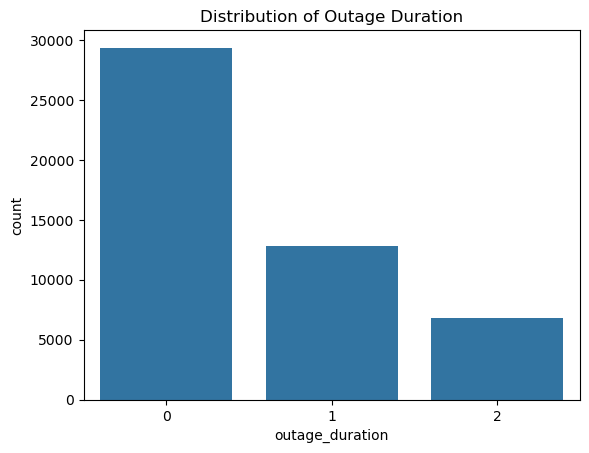

In [78]:
sns.countplot(x='outage_duration', data=train_merged)
plt.title('Distribution of Outage Duration')
plt.show()

### We note that the dataset is slightly skewed 

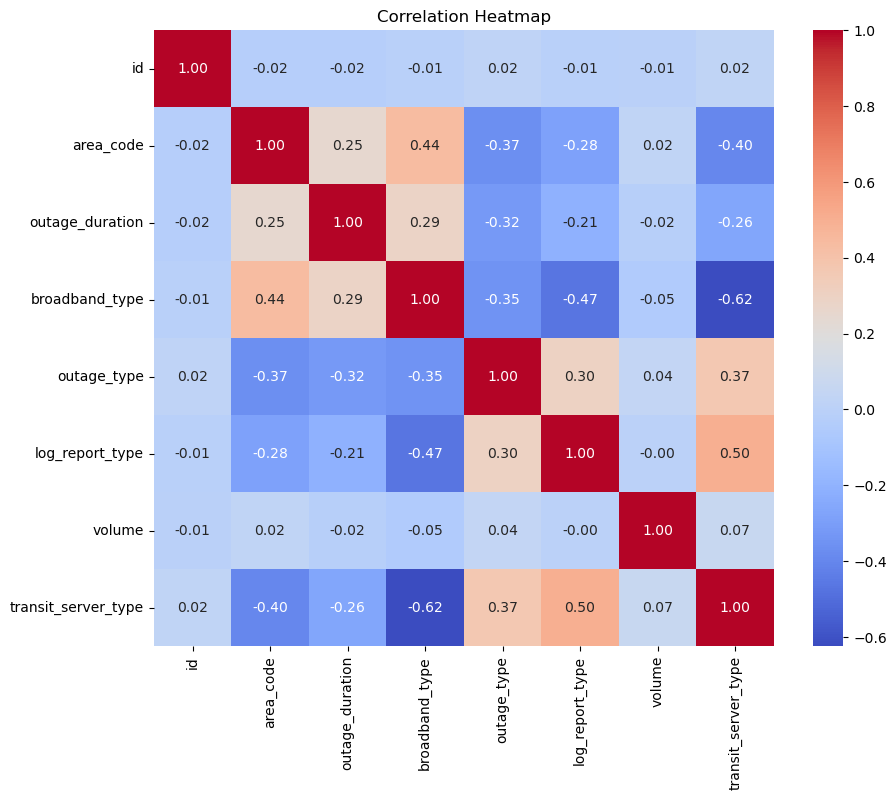

In [79]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_merged.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### We note that outage_duration has stronger positive correlations with area_code, broadband_type
### And it has stronger negative correlations with outage_type, log_report_type, and transit_server_type
### There is no strong correlation with volume, so we will ignore that column for now

In [100]:
# X is training set with id, volume, and target variable (outage_duration) removed & y is test set with only the target variable

X = train_merged.drop(['id', 'volume', 'outage_duration'], axis=1)
y = train_merged['outage_duration']

# RandomForestClassifier while addressing the class skewedness

In [101]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight

#### Split data into training and test sets

In [102]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Get class weights with balanced strategy

In [103]:
import numpy as np

In [104]:
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)

### Intitialize RF classifier with derived class weights

In [105]:
rf_classifier = RandomForestClassifier(class_weight=dict(enumerate(class_weights)))

### Perform cross-validation and hyperparameter tuning

In [106]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [107]:
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 0.5556926655603308,
                                                            1: 1.2748275413250032,
                                                            2: 2.403705748818946}),
             n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1_macro')

### Evaluate model using F1-score

In [108]:
from sklearn.metrics import classification_report, confusion_matrix

In [109]:
best_rf_model = grid_search.best_estimator_
val_predictions = best_rf_model.predict(X_val)
print(classification_report(y_val, val_predictions))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83      5846
           1       0.60      0.67      0.63      2568
           2       0.56      0.81      0.66      1381

    accuracy                           0.75      9795
   macro avg       0.69      0.75      0.71      9795
weighted avg       0.78      0.75      0.76      9795



### Make predictions on test set

In [110]:
test_merged

,id,area_code,broadband_type,outage_type,log_report_type,volume,transit_server_type
0,3340,344,2,4,312,2,35
1,14067,933,2,1,134,1,20
2,1134,16,8,1,155,10,11
3,1134,16,8,1,170,6,11
4,27,793,8,1,73,3,11
...,...,...,...,...,...,...,...
12861,989,38,3,4,153,1,10
12862,989,38,3,4,154,1,27
12863,989,38,3,4,154,1,10
12864,3129,1067,8,1,54,8,11


In [111]:
test_predictions = best_rf_model.predict(test_merged.drop(['id', 'volume'], axis=1))

# To answer the questions from the Operations Team -

In [117]:
long_outages_areas = train_merged[train_merged['outage_duration'] == 2]['area_code'].value_counts().head(5)
long_outages_broadband = train_merged[train_merged['outage_duration'] == 2]['broadband_type'].value_counts()

print("1. Which areas are most prone to long outage durations?")
print(long_outages_areas)
print("2. Which broadband types are suspect of long outage durations?")
print(long_outages_broadband)

1. Which areas are most prone to long outage durations?
area_code
13     490
734    338
821    313
32     300
984    256
Name: count, dtype: int64
2. Which broadband types are suspect of long outage durations?
broadband_type
8     3533
2     1456
6      498
4      364
7      306
1      253
3      126
5      110
9       98
10      70
Name: count, dtype: int64


#### 3. Any other recommendations to improve the detection of outage durations.
### Further feature engineering, exploring additional data sources, and fine-tuning models can improve detection.